# <center><a href='https://mybinder.org/v2/gh/fortierq/binder-mp2i/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fmp2i-fsm%252Fmp2i-2021%26urlpath%3Dlab%252Ftree%252Fmp2i-2021%252F4_c%252Fcours%252F4_pointeur.ipynb%26branch%3Dmain'>Pointeurs                                                                    <img src=https://mybinder.org/badge.svg></a></center>

## Adresse mémoire
Quand on définit une variable (que ce soit en C, OCaml ou Python), sa valeur est stockée dans la mémoire RAM de l'ordinateur. La mémoire RAM est décomposée en cases, chaque case occupant 8 bits (1 octet, on dit aussi *byte*) et possédant une **adresse mémoire**.  

<center>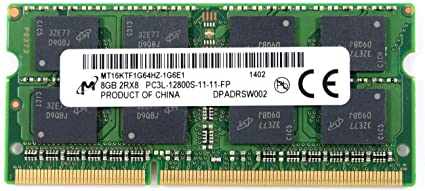</center>

On peut connaître l'adresse mémoire où est stockée une variable avec `&` (opérateur de **référencement**) :

In [1]:
int x = 3;
&x

@0x7ffd245a6878

In [2]:
sizeof(x)

4

`&x` renvoie en fait le premier octet de la zone mémoire contenant la valeur de `x`.

**Remarque** : on a déjà vu que `&` est aussi utilisé comme "et binaire". Il a donc deux significations différentes, suivant le contexte.  
**Remarque** : `int _ = ...` sert juste à éviter d'afficher la valeur de retour de `printf`.

Un **pointeur** est une variable dont la valeur est une adresse mémoire. On utilise `*` dans un type pour définir un pointeur. Par exemple, un `float*` est un pointeur sur un `float`.

In [3]:
int x = 3;
int* p = &x;  // p est un pointeur sur un int
int _ = printf("%p", p); // p contient bien l'adresse mémoire de x

0x7f80eb8f0038

Le code ci-dessus permet donc de définir un pointeur contenant l'adresse de la valeur de `x`.  
**Remarque** : On peut écrire `int* p` ou `int *p` (il n'y a pas de concensus clair sur la notation à utiliser).  

`*` est aussi utilisé comme opérateur de **déréférencement**, c'est-à-dire qu'il permet d'obtenir la valeur à l'adresse d'un pointeur :

In [4]:
*p  // valeur à la case mémoire dont p stocke l'adresse

3

On peut modifier la valeur pointée par `p` (ce qui revient, dans notre cas, à changer la valeur de `x`) :

In [5]:
*p = 14

14

<center>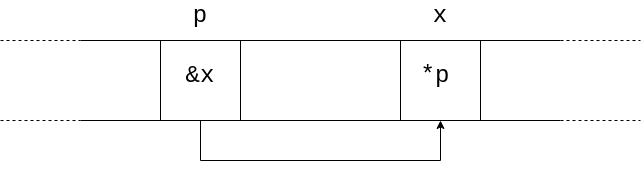</center>

Pour résumer :
- `p` contient une adresse mémoire
- `&x` est l'adresse mémoire de `x`
- `*p` est la valeur pointé par `p`

Il est possible de modifier l'adresse mémoire contenu dans un pointeur :

In [6]:
int y = 42;
p = &y;  // p pointe maintenant sur y
printf("%p", p);

0x7f80eb8f0048

**Remarque** : `*` est utilisé avec différentes significations suivant le contexte :
- Multiplication de deux entiers (`3 * 4`)
- Définition d'un pointeur (`int* p = ...`)
- Obtenir la valeur à l'adresse d'un pointeur (`*p`)

## Registre et taille des adresses

Un registre est une mémoire interne au processeur qui permet de stocker des variables et a l'avantage d'être plus rapide d'accès que la mémoire RAM, bien que plus limité.  
Un processeur 64 bits possède des registres de taille 64 bits. Les adresses mémoires sont alors stockées sur 64 bits :

In [7]:
sizeof(p) // 8 octets donc 64 bits

8

Sur les processeurs 32 bits plus anciens, les registres et donc les adresses sont stockés sur 32 bits.

**Exercice** : Quel est le nombre d'adresses différentes que l'on peut stocker sur 32 bits? Sachant que chaque octet de la mémoire RAM doit posséder une adresse, quelle est la quantité maximale de RAM utilisable par un processeur 32 bits?

On peut stocker $2^{32}$ adresses différentes sur $32$ bits, donc on peut théoriquement utiliser au plus $2^{32}$ octets $\approx$ $4$ Go de mémoire RAM avec un processeur $32$ bits.

## Pointeur `NULL`

`NULL` est une valeur spéciale utilisée pour un pointeur qui signifie "aucune adresse". On peut s'en servir pour initialiser un pointeur et le modifier ensuite. Il n'est pas possible d'accéder à la valeur pointée par un pointeur `NULL` :

In [8]:
int* p;

In [9]:
p

@0x7ffd245a6878

In [10]:
int* p = NULL;
p

@0x7ffd245a6878

In [11]:
int x;
x

0

## Passage par valeur et par adresse

Essayons d'écrire une fonction pour échanger deux variables :

In [12]:
void swap(int a, int b) {
    int tmp = a;
    a = b;
    b = tmp;
}

In [13]:
int x = 2;
int y = 3;
swap(x, y);
int _ = printf("x: %d, y: %d", x, y);

x: 2, y: 3

Cela ne marche pas (`x` et `y` n'ont pas été échangé) car ce sont des **copies** de `x` et `y` qui sont passées en arguments de `swap`. Les variables qui sont modifiées à l'intérieur de `swap` ne sont donc pas `x` et `y`, mais des copies. C'est ce qu'on appelle un passage d'argument **par valeur**.  
À la place, on peut passer les variables **par adresse** :

In [14]:
void swap(int *a, int *b) {
    int tmp = *a;
    *a = *b;
    *b = tmp;
}

In [15]:
int x = 2;
int y = 3;
swap(&x, &y);
int _ = printf("x: %d, y: %d", x, y);

x: 3, y: 2

**Exercice** : Ecrire une fonction de prototype `void incr(int* p)` qui augmente de 1 un entier en argument.

In [16]:
void incr(int* p) {
    (*p)++;
}
int x = 0;
incr(&x);
x

1

## Renvoie de plusieurs valeurs avec des pointeurs

Différentes options pour avoir une fonction renvoyant plusieurs valeurs :
- Utiliser un `struct` (cours suivant)  
- Renvoyer un tableau (cours suivant)
- Stocker les résultats à renvoyer dans des variables passées par adresse

Les fonctions de la librairie standard du C (`glibc`) renvoie toutes un `int` qui est en fait un [code d'erreur](https://www.gnu.org/software/libc/manual/html_node/Error-Codes.html). Lorsque l'on doit récupérer une valeur par la fonction, cela se fait via un passage d'argument par adresse, qui est modifié par la fonction.  
Par exemple la fonction `fscanf`, qui permet de lire dans un fichier et de mettre 

## Validité d'un pointeur

Si un pointeur essaie d'accéder à un emplacement mémoire non autorisé, il y a une erreur (la fameuse *segmentation fault*) et le système d'exploitation termine le programme, par mesure de sécurité :

<center>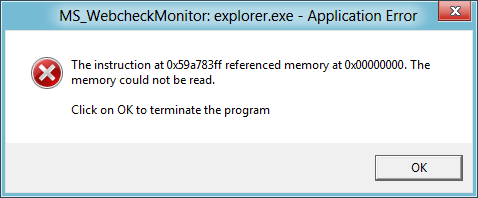</center>

Par exemple, considérons la fonction suivante :

In [17]:
int* f() {
    int x = 42;
    return &x;
}

input_line_34:3:13: warning: address of stack memory associated with local variable 'x' returned [-Wreturn-stack-address]
    return &x;
            ^


On obtient un *warning* (et non pas une erreur), le problème étant que `x` est supprimé de la mémoire lorsque `f` termine (car `x` est une variable locale à `f`, et n'existe qu'à l'intérieur de `f`).  

En effet, essayons de compiler puis exécuter le code suivant dans le fichier pointer.c (on verra plus en détail la compilation dans un prochain cours) :
```c
int* p = f();
*p = 4;
```

In [18]:
! gcc pointer.c

pointer.c: In function ‘f’:
pointer.c:5:12: warning: function returns address of local variable [-Wreturn-local-addr]
    5 |     return &x;
      |            ^~


On obtient le même *warning* et un fichier exécutable `a.out` a été créé, que l'on peut exécuter :

In [19]:
! ./a.out

Segmentation fault (core dumped)


Une erreur de segmentation (*segmentation fault*) est un plantage d'une application qui a tenté d'accéder à un emplacement mémoire qui ne lui était pas alloué.

**Remarque** : pour une raison que j'ignore, le code ci-dessus ne déclenche pas d'erreur avec Jupyter (et le noyau xeus-cling pour C++).

## Pile

Les variables que l'on a défini jusqu'à maintenant sont stockées dans une zone mémoire appelée **pile** (*stack*), qui a, comme son nom l'indique, une structure de pile. C'est une partie de la mémoire RAM où les variables locales sont stockées et automatiquement supprimées lorsqu'on sort de leur portée. Les arguments d'une fonction sont aussi stockés dans la pile.  
Par exemple, dans le code suivant, 3 variables (`x`, `y` et `a`) sont allouées dans la pile lors de l'exécution de `f`, puis automatiquement libérées (pour que la mémoire soit utilisée par un autre programme) lorsque l'appel de `f` termine :

In [20]:
void f(int x, int y) {
    int a = 3;
    return;
}
f(1, 2);

Un tel appel de fonction doit aussi stocker une adresse mémoire correspondant à l'instruction qu'il faudra exécuter pour continuer le programme, une fois que l'appel de fonction sera terminé. C'est pour cette raison que l'on obtient une erreur *Stack Overflow* lorsque l'on effectue trop d'appels récursifs (il n'y a plus assez de place dans la pile pour stocker tous les appels récursifs).

## Tas, `malloc` et `free`

Un inconvénient avec le fait de stocker des variables dans la pile est que la taille de ces variables doit être connue à l'avance (à la compilation). Dans certains cas, ceci est impossible. Par exemple, si un programme charge une image d'un utilisateur, on ne peut pas savoir à l'avance quelle sera la taille de l'image donc combien de mémoire il faut allouer.  
Dans ce cas-là, on utilise le **tas** (*heap*), qui est aussi dans la mémoire RAM mais qui s'utilise différemment. Quelques différences entre le tas et la pile :
- La pile a une taille fixe et peut donc être saturée assez rapidement. Le tas est automatiquement redimensionné (dans la limite de la mémoire RAM totale).  
- Il est beaucoup plus rapide d'allouer dans la pile que dans le tas.
- Il est obligatoire d'accéder à la mémoire du tas en utilisant un pointeur.

Pour allouer dans le tas (on parle d'**allocation dynamique**), on utilise `malloc`, qui prend en argument le nombre d'octets à allouer, et renvoie un pointeur vers la zone mémoire qui a été créée :

In [21]:
int* p = (int*)malloc(4); // p est un pointeur vers un entier de 4 octets alloué sur le tas

**Remarque** : `malloc` renvoie un `void *`, qui signifie "un type de pointeur quelconque". On le convertit en `int*` avec `(int*)`. Cette conversion est obligatoire en C++, mais pas en C.

In [22]:
*p  // la valeur créée est aléatoire par défaut

-679631456

In [23]:
*p = 42;  // mais on peut la modifier
*p

42

Souvent, plutôt que d'écrire le nombre d'octets nécessaire, on utilise `sizeof` qui donne le bon nombre d'octets :

In [24]:
float* p = (float*)malloc(sizeof(float));
*p  // valeur aléatoire que l'on peut modifier

-5.61852e+14f

**Attention** : Une valeur allouée sur le tas n'est jamais libérée automatiquement. Il y a donc un risque de **fuite de mémoire** (*memory leak*) qui peut, si elle se produit souvent, utiliser la totalité de la mémoire RAM et empêcher l'ordinateur de fonctionner.  

In [25]:
for(int i = 0; i < 10000000; i++)
    malloc(1);

In [26]:
! ps aux --sort -%mem | head -2

USER         PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
root         228 84.6  6.8 781136 489472 ?       Ssl  15:33   0:08 /opt/conda/bin/xcpp -f /tmp/tmp65a2e_w5.json -std=c++14


Il faut donc libérer la mémoire lorsqu'elle n'est plus utilisée, avec `free` :

In [27]:
p

@0x7ffd245a6878

In [28]:
free(p)  // libère la mémoire pointée par p pour qu'elle puisse être utilisée par un autre programme

In [29]:
! gcc pointer.c

pointer.c: In function ‘f’:
pointer.c:5:12: warning: function returns address of local variable [-Wreturn-local-addr]
    5 |     return &x;
      |            ^~


In [30]:
! ./a.out

Segmentation fault (core dumped)


In [31]:
*p

-2.23674e+26f

`*p` n'est maintenant plus valable : il se produirait une erreur si on essaie d'y accéder. De même, il y aurait une erreur si on essaie de supprimer deux fois le même espace mémoire avec `free`.  

## Langages de haut niveau

La manipulation des pointeurs et du tas est difficile et source fréquente d'erreurs. C'est pourquoi beaucoup de langages de programmation haut niveau (qui ne se préoccupent pas des détails de l'architecture) gèrent ces problèmes à la place du programmeur. Par exemple, toutes les variables en Python sont en fait des pointeurs qui sont gérés automatiquement.  
En particulier, un ***garbage collector*** (ramasse-miette) permet de supprimer automatiquement la mémoire du tas qui n'est plus utilisée, même si cela se fait au détriment du temps d'exécution. Voici quelques méthodes utilisés par les *garbage collector* :  
- *Reference counting* (utilisé par CPython) : On garde un compteur pour savoir combien de pointeurs existe t-il sur une zone mémoire. Quand ce compteur devient égal à 0, on libère la mémoire correspondante.  
- *Tracing* (utilisé par Java) : Parcourt le graphe des références et supprime les zones non accessibles. 

In [32]:
void f() {
    int x = 2;
    int* p = &x;
}